#### Connect To Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#cd /content/drive/MyDrive/MachineLearning/CapstoneProject

## Reading required files

#### Reading Train Annotations

In [ ]:
import pandas as pd
annotationsTrainDF = pd.read_csv("/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/Annotations/Train Annotations.csv")
annotationsTrainDF.rename(columns = {'Bounding Box coordinates':'xmin'}, inplace = True)
annotationsTrainDF.rename(columns = {'Unnamed: 2':'ymin'}, inplace = True)
annotationsTrainDF.rename(columns = {'Unnamed: 3':'xmax'}, inplace = True)
annotationsTrainDF.rename(columns = {'Unnamed: 4':'ymax'}, inplace = True)
annotationsTrainDF.rename(columns = {'Image class':'Image_class'}, inplace = True)
annotationsTrainDF.rename(columns = {'Image Name':'Image_Name'}, inplace = True)
annotationsTrainDF

,Image_Name,xmin,ymin,xmax,ymax,Image_class
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106
...,...,...,...,...,...,...
8139,08140.jpg,3,44,423,336,78
8140,08141.jpg,138,150,706,523,196
8141,08142.jpg,26,246,660,449,163
8142,08143.jpg,78,526,1489,908,112


#### Reading Test Annotations

In [ ]:
import pandas as pd
annotationsTestDF = pd.read_csv("/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/Annotations/Test Annotation.csv")
annotationsTestDF.rename(columns = {'Bounding Box coordinates':'xmin'}, inplace = True)
annotationsTestDF.rename(columns = {'Unnamed: 2':'ymin'}, inplace = True)
annotationsTestDF.rename(columns = {'Unnamed: 3':'xmax'}, inplace = True)
annotationsTestDF.rename(columns = {'Unnamed: 4':'ymax'}, inplace = True)
annotationsTestDF.rename(columns = {'Image class':'Image_class'}, inplace = True)
annotationsTestDF.rename(columns = {'Image Name':'Image_Name'}, inplace = True)
annotationsTestDF

,Image_Name,xmin,ymin,xmax,ymax,Image_class
0,00001.jpg,30,52,246,147,181
1,00002.jpg,100,19,576,203,103
2,00003.jpg,51,105,968,659,145
3,00004.jpg,67,84,581,407,187
4,00005.jpg,140,151,593,339,185
...,...,...,...,...,...,...
8036,08037.jpg,49,57,1169,669,63
8037,08038.jpg,23,18,640,459,16
8038,08039.jpg,33,27,602,252,17
8039,08040.jpg,33,142,521,376,38


## Image Segregation

#### Using Split-folder to create train and validation files

In [ ]:
# pip install split-folders

In [ ]:
# import splitfolders # or import splitfolders
# input_folder = "/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images//Train Images/"
# output = "/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/" #where you want the split datasets saved. one will be created if it does not exist or none is set

# splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .2)) # ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.

## Creating data required for training

#### Creating list containing files and folder names for training 

In [ ]:
import pandas as pd
import os
import glob

#/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Samples/Jeep Liberty SUV 2012/00271.jpg
trainDataSetPath="/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/train/*/*"
#reading png files in the path
trainList = glob.glob(trainDataSetPath)
print(trainList)

trainListPaths = []
for fileandFolder in trainList:
  lList = fileandFolder.split("/")[-2:]
  trainListPaths.append(lList)

print(len(trainListPaths))

['/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/train/Volvo 240 Sedan 1993/01518.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/train/Volvo 240 Sedan 1993/03345.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/train/Volvo 240 Sedan 1993/02067.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/train/Volvo 240 Sedan 1993/01431.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/train/Volvo 240 Sedan 1993/04215.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/train/Volvo 240 Sedan 1993/02870.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/train/Volvo 240 Sedan 1993/04538.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Spli

#### Creating list containing files and folder names for Validation

In [ ]:
import pandas as pd
import os
import glob

#/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Samples/Jeep Liberty SUV 2012/00271.jpg
validationDatasetPath="/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/val/*/*"
#reading png files in the path
validationList = glob.glob(validationDatasetPath)
print(validationList)

validationListPaths = []
for fileandFolder in validationList:
  lList = fileandFolder.split("/")[-2:]
  validationListPaths.append(lList)

print(len(validationListPaths))

['/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/val/Volvo 240 Sedan 1993/05625.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/val/Volvo 240 Sedan 1993/00455.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/val/Volvo 240 Sedan 1993/00426.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/val/Volvo 240 Sedan 1993/01015.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/val/Volvo 240 Sedan 1993/01908.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/val/Volvo 240 Sedan 1993/01992.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/val/Volvo 240 Sedan 1993/00030.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/val/Volvo 24

#### Creating list containing files and folder names for testing

In [ ]:
import pandas as pd
import os
import glob

#/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Samples/Jeep Liberty SUV 2012/00271.jpg
testDataSetPath="/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/Car Images/Test Images/*/*"
#reading png files in the path
testList = glob.glob(testDataSetPath)
print(testList)

testListPaths = []
for fileandFolder in testList:
  lList = fileandFolder.split("/")[-2:]
  testListPaths.append(lList)

print(len(testListPaths))

['/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/Car Images/Test Images/Acura Integra Type R 2001/00130.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/Car Images/Test Images/Acura Integra Type R 2001/01002.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/Car Images/Test Images/Acura Integra Type R 2001/00128.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/Car Images/Test Images/Acura Integra Type R 2001/01176.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/Car Images/Test Images/Acura Integra Type R 2001/00565.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/Car Images/Test Images/Acura Integra Type R 2001/00386.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/Car Images/Test Images/Acura Integra Type R 2001/01035.jpg', '/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/Car Images/Test Images/Acura Integra Type R 2001/00711.jpg',

#### Creating Training dataframe

In [ ]:
dfTrain = pd.DataFrame(trainListPaths, columns = ['carName','imageName'])
dfTrain['carModel'] = dfTrain['carName'].str[-4:]
dfTrain['carModel_1'] = dfTrain['carName'].str[:-4]

In [ ]:
dfTrain[['carName','carModel','carModel_1','imageName']].head(1)

,carName,carModel,carModel_1,imageName
0,Volvo 240 Sedan 1993,1993,Volvo 240 Sedan,01518.jpg


#### Creating Validation dataframe

In [ ]:
dfValidation = pd.DataFrame(validationListPaths, columns = ['carName','imageName'])
dfValidation['carModel'] = dfValidation['carName'].str[-4:]
dfValidation['carModel_1'] = dfValidation['carName'].str[:-4]

In [ ]:
dfValidation[['carName','carModel','carModel_1','imageName']].head(1)

,carName,carModel,carModel_1,imageName
0,Volvo 240 Sedan 1993,1993,Volvo 240 Sedan,05625.jpg


#### Creating Testing dataframe

In [ ]:
dfTest = pd.DataFrame(testListPaths, columns = ['carName','imageName'])
dfTest['carModel'] = dfTest['carName'].str[-4:]
dfTest['carModel_1'] = dfTest['carName'].str[:-4]

In [ ]:
dfTest[['carName','carModel','carModel_1','imageName']].head(1)

,carName,carModel,carModel_1,imageName
0,Acura Integra Type R 2001,2001,Acura Integra Type R,00130.jpg


#### Merging train dataframe with annotations

In [ ]:
train_df = dfTrain.merge(annotationsTrainDF, how='inner', left_on='imageName', right_on='Image_Name')
train_df = train_df.assign(image_path='/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/train')

In [ ]:
train_df.head(1)

,carName,imageName,carModel,carModel_1,Image_Name,xmin,ymin,xmax,ymax,Image_class,image_path
0,Volvo 240 Sedan 1993,01518.jpg,1993,Volvo 240 Sedan,01518.jpg,24,98,573,352,194,/content/drive/MyDrive/MachineLearning/Capston...


#### Merging Validation dataframe with annotations

In [ ]:
val_df = dfValidation.merge(annotationsTrainDF, how='inner', left_on='imageName', right_on='Image_Name')
val_df = val_df.assign(image_path='/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Split/val')

In [ ]:
val_df.head(1)

,carName,imageName,carModel,carModel_1,Image_Name,xmin,ymin,xmax,ymax,Image_class,image_path
0,Volvo 240 Sedan 1993,05625.jpg,1993,Volvo 240 Sedan,05625.jpg,41,44,624,439,194,/content/drive/MyDrive/MachineLearning/Capston...


#### Merging test dataframe with annotations

In [ ]:
test_df = dfTest.merge(annotationsTestDF, how='inner', left_on='imageName', right_on='Image_Name')
test_df = test_df.assign(image_path='/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/Car Images/Test Images')

In [ ]:
test_df.head(1)

,carName,imageName,carModel,carModel_1,Image_Name,xmin,ymin,xmax,ymax,Image_class,image_path
0,Acura Integra Type R 2001,00130.jpg,2001,Acura Integra Type R,00130.jpg,27,74,774,449,6,/content/drive/MyDrive/MachineLearning/Capston...


#### Checking basic details of dataframe

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6442 entries, 0 to 6441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   carName      6442 non-null   object
 1   imageName    6442 non-null   object
 2   carModel     6442 non-null   object
 3   carModel_1   6442 non-null   object
 4   Image_Name   6442 non-null   object
 5   xmin         6442 non-null   int64 
 6   ymin         6442 non-null   int64 
 7   xmax         6442 non-null   int64 
 8   ymax         6442 non-null   int64 
 9   Image_class  6442 non-null   int64 
 10  image_path   6442 non-null   object
dtypes: int64(5), object(6)
memory usage: 603.9+ KB


In [ ]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1702 entries, 0 to 1701
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   carName      1702 non-null   object
 1   imageName    1702 non-null   object
 2   carModel     1702 non-null   object
 3   carModel_1   1702 non-null   object
 4   Image_Name   1702 non-null   object
 5   xmin         1702 non-null   int64 
 6   ymin         1702 non-null   int64 
 7   xmax         1702 non-null   int64 
 8   ymax         1702 non-null   int64 
 9   Image_class  1702 non-null   int64 
 10  image_path   1702 non-null   object
dtypes: int64(5), object(6)
memory usage: 159.6+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8041 entries, 0 to 8040
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   carName      8041 non-null   object
 1   imageName    8041 non-null   object
 2   carModel     8041 non-null   object
 3   carModel_1   8041 non-null   object
 4   Image_Name   8041 non-null   object
 5   xmin         8041 non-null   int64 
 6   ymin         8041 non-null   int64 
 7   xmax         8041 non-null   int64 
 8   ymax         8041 non-null   int64 
 9   Image_class  8041 non-null   int64 
 10  image_path   8041 non-null   object
dtypes: int64(5), object(6)
memory usage: 753.8+ KB


#### Label encoding the car names for classification purpose

In [ ]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
train_df['le_carName']= label_encoder.fit_transform(train_df['carName'])
val_df['le_carName']= label_encoder.fit_transform(val_df['carName'])
test_df['le_carName']= label_encoder.fit_transform(test_df['carName'])

#### Extracting the height and width of the images from Train set

In [ ]:
## from matplotlib import pyplot as plt
## import cv2
## import numpy as np
## import pandas as pd

## h = []
## w =[]

## mypath="/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset_1/Dataset/Car Images/Train Images/"

## for row in dfMerged.itertuples(index=False, name=None):
##   # print(config.IMAGES_PATH + "/" + row[0] + "/" + row[1])
##   imagePath = (mypath  + "/" + row[0] + "/" + row[1])#os.path.sep.join([config.IMAGES_PATH, filename])
##   image = cv2.imread(imagePath)
##   h.append(image.shape[:2][0])
##   w.append(image.shape[:2][1])

#### Extracting the height and width of the images from Test set

In [ ]:
# from matplotlib import pyplot as plt
# import cv2
# import numpy as np
# import pandas as pd

# h = []
# w =[]

# mypath="/content/drive/MyDrive/MachineLearning/CapstoneProject/Dataset/Car Images/Test Images"

# for row in test_df[['carName','imageName']].itertuples(index=False, name=None):
#   # print(config.IMAGES_PATH + "/" + row[0] + "/" + row[1])
#   imagePath = (mypath  + "/" + row[0] + "/" + row[1])#os.path.sep.join([config.IMAGES_PATH, filename])
#   image = cv2.imread(imagePath)
#   h.append(image.shape[:2][0])
#   w.append(image.shape[:2][1])

In [ ]:
# dfTest['Height'] = h
# dfTest['Width'] = w
# dfTest.to_csv("/content/drive/MyDrive/MachineLearning/CapstoneProject/test_8041_images.csv")
# dfTest_W_H = pd.read_csv("/content/drive/MyDrive/MachineLearning/CapstoneProject/train_8144_images.csv")

#### Creating Train and validation dataframe with width and height

In [ ]:
dfTrain_W_H = pd.read_csv("/content/drive/MyDrive/MachineLearning/CapstoneProject/train_8144_images.csv")
dfTrain_W_H = dfTrain_W_H[['Height','Width','Image_Name']]
train_df = train_df.merge(dfTrain_W_H, how='inner', left_on='imageName', right_on='Image_Name')
train_df['File'] = train_df['image_path'] + "/" + train_df['carName'] + "/" + train_df['imageName']
train_df.rename(columns = {'Image_class':'Class'}, inplace = True)
train_df.rename(columns = {'le_carName':'Label'}, inplace = True)
train_df.head(1)

,carName,imageName,carModel,carModel_1,Image_Name_x,xmin,ymin,xmax,ymax,Class,image_path,Label,Height,Width,Image_Name_y,File
0,Volvo 240 Sedan 1993,01518.jpg,1993,Volvo 240 Sedan,01518.jpg,24,98,573,352,194,/content/drive/MyDrive/MachineLearning/Capston...,192,431,575,01518.jpg,/content/drive/MyDrive/MachineLearning/Capston...


In [ ]:
val_df = val_df.merge(dfTrain_W_H, how='inner', left_on='imageName', right_on='Image_Name')
val_df['File'] = val_df['image_path'] + "/" + val_df['carName'] + "/" + val_df['imageName']
val_df.rename(columns = {'Image_class':'Class'}, inplace = True)
val_df.rename(columns = {'le_carName':'Label'}, inplace = True)
val_df.head(1)

,carName,imageName,carModel,carModel_1,Image_Name_x,xmin,ymin,xmax,ymax,Class,image_path,Label,Height,Width,Image_Name_y,File
0,Volvo 240 Sedan 1993,05625.jpg,1993,Volvo 240 Sedan,05625.jpg,41,44,624,439,194,/content/drive/MyDrive/MachineLearning/Capston...,192,480,640,05625.jpg,/content/drive/MyDrive/MachineLearning/Capston...


#### Creating Test dataframe with width and height

In [ ]:
test_df.head(2)

,carName,imageName,carModel,carModel_1,Image_Name,xmin,ymin,xmax,ymax,Image_class,image_path,le_carName
0,Acura Integra Type R 2001,00130.jpg,2001,Acura Integra Type R,00130.jpg,27,74,774,449,6,/content/drive/MyDrive/MachineLearning/Capston...,1
1,Acura Integra Type R 2001,01002.jpg,2001,Acura Integra Type R,01002.jpg,54,225,499,610,6,/content/drive/MyDrive/MachineLearning/Capston...,1


In [ ]:
dfTest_W_H = pd.read_csv("/content/drive/MyDrive/MachineLearning/CapstoneProject/test_8041_images.csv")
# dfTest_W_H
dfTest_W_H = dfTest_W_H[['Height','Width','imageName']]
test_df = test_df.merge(dfTest_W_H, how='inner', left_on='imageName', right_on='imageName')
test_df['File'] = test_df['image_path'] + "/" + test_df['carName'] + "/" + test_df['imageName']
test_df.rename(columns = {'Image_class':'Class'}, inplace = True)
test_df.rename(columns = {'le_carName':'Label'}, inplace = True)
test_df.head(1)

,carName,imageName,carModel,carModel_1,Image_Name,xmin,ymin,xmax,ymax,Class,image_path,Label,Height,Width,File
0,Acura Integra Type R 2001,00130.jpg,2001,Acura Integra Type R,00130.jpg,27,74,774,449,6,/content/drive/MyDrive/MachineLearning/Capston...,1,458,800,/content/drive/MyDrive/MachineLearning/Capston...


## Display sample data with bounding boxes

#### Display sample data for Train set images

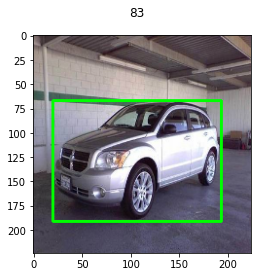

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import pandas as pd

#Pickup a random image number
img_num = np.random.randint(0, train_df.shape[0])
#Read the image and draw a rectangle as per bounding box information
img = cv2.imread(train_df.loc[img_num,'File'])
img = cv2.resize(img,(224, 224))
w = train_df.loc[img_num, 'Width']
h = train_df.loc[img_num, 'Height']
x_ratio = 224/w
y_ratio = 224/h
cv2.rectangle(img, 
             (int(train_df.loc[img_num, 'xmin']*x_ratio),int(train_df.loc[img_num, 'ymin']*y_ratio)),
             (int(train_df.loc[img_num, 'xmax']*x_ratio),int(train_df.loc[img_num, 'ymax']*y_ratio)), 
             (0,255,0),
             2)

#Convert BGR format (used by opencv to RGB format used by matplotlib)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Draw image using matplotlib
plt.suptitle(train_df.loc[img_num, 'Class'])
plt.imshow(img)
plt.show()

#### Display sample data for Validation set images

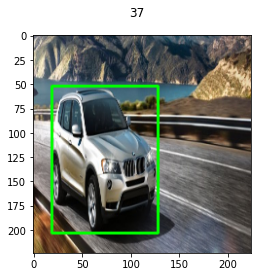

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import pandas as pd

#Pickup a random image number
img_num = np.random.randint(0, val_df.shape[0])
#Read the image and draw a rectangle as per bounding box information
img = cv2.imread(val_df.loc[img_num,'File'])
img = cv2.resize(img,(224, 224))
w = val_df.loc[img_num, 'Width']
h = val_df.loc[img_num, 'Height']
x_ratio = 224/w
y_ratio = 224/h
cv2.rectangle(img, 
             (int(val_df.loc[img_num, 'xmin']*x_ratio),int(val_df.loc[img_num, 'ymin']*y_ratio)),
             (int(val_df.loc[img_num, 'xmax']*x_ratio),int(val_df.loc[img_num, 'ymax']*y_ratio)), 
             (0,255,0),
             2)

#Convert BGR format (used by opencv to RGB format used by matplotlib)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Draw image using matplotlib
plt.suptitle(val_df.loc[img_num, 'Class'])
plt.imshow(img)
plt.show()

#### Display sample data for Test set images

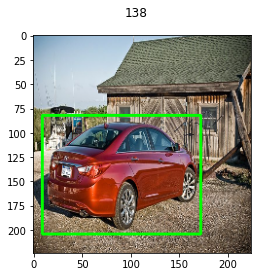

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import pandas as pd

#Pickup a random image number
img_num = np.random.randint(0, test_df.shape[0])
#Read the image and draw a rectangle as per bounding box information
img = cv2.imread(test_df.loc[img_num,'File'])
img = cv2.resize(img,(224, 224))
w = test_df.loc[img_num, 'Width']
h = test_df.loc[img_num, 'Height']
x_ratio = 224/w
y_ratio = 224/h
cv2.rectangle(img, 
             (int(test_df.loc[img_num, 'xmin']*x_ratio),int(test_df.loc[img_num, 'ymin']*y_ratio)),
             (int(test_df.loc[img_num, 'xmax']*x_ratio),int(test_df.loc[img_num, 'ymax']*y_ratio)), 
             (0,255,0),
             2)

#Convert BGR format (used by opencv to RGB format used by matplotlib)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Draw image using matplotlib
plt.suptitle(test_df.loc[img_num, 'Class'])
plt.imshow(img)
plt.show()

In [ ]:
# asdjkhasdjkhjk

#### Checking number of classes in each dataframe

In [ ]:
#Create a dictionary to hold label and corresponding class name
num_classes_train = train_df['Label'].unique()
print(len(num_classes_train))

196


In [ ]:
#Create a dictionary to hold label and corresponding class name
num_classes_val = val_df['Label'].unique()
print(len(num_classes_val))

196


In [ ]:
#Create a dictionary to hold label and corresponding class name
num_classes_test = test_df['Label'].unique()
label_class_dict = dict(zip(test_df['Label'], test_df['carName']))
print(len(num_classes_test))

196


In [ ]:
num_classes = train_df['Label'].unique()

## Build a Batch Generator

In [ ]:
import tensorflow as tf

In [ ]:
img_size = 224

In [ ]:
def batch_generator(df, batch_size=32):

    while True:

        #Create indexes
        image_nums = np.random.randint(0,df.shape[0], size=batch_size)

        #Create empty arrays
        #1. To hold image input
        batch_images = np.zeros(shape=(batch_size, img_size, img_size, 3))

        #Classification Labels 
        batch_labels = np.zeros(shape=(batch_size, len(num_classes)))
        
        #Regression labels - 4 numbers per example image
        batch_bboxes = np.zeros(shape=(batch_size, 4))
        

        for i in range(batch_size):

            #Read image and resize
            img = tf.keras.preprocessing.image.load_img(df.loc[image_nums[i], 'File'], 
                                                        target_size=(img_size, img_size))
            
            #Conver to numpy array
            img_array = tf.keras.preprocessing.image.img_to_array(img)

            #Update batch
            batch_images[i] = img_array

            #Read image classification label & convert to one hot vector
            cl_label = df.loc[image_nums[i], 'Label']
            cl_label = tf.keras.utils.to_categorical(cl_label, num_classes=len(num_classes))
            batch_labels[i] = cl_label

            #Read and resize bounding box co-ordinates
            img_width = df.loc[image_nums[i], 'Width']
            img_height = df.loc[image_nums[i], 'Height']
            
            xmin = df.loc[image_nums[i], 'xmin'] * img_size/img_width
            xmax = df.loc[image_nums[i], 'xmax'] * img_size/img_width

            ymin = df.loc[image_nums[i], 'ymin'] * img_size/img_height
            ymax = df.loc[image_nums[i], 'ymax'] * img_size/img_height

            #We will ask model to predict xmin, ymin, width and height of bounding box
            batch_bboxes[i] = [xmin, ymin, xmax-xmin, ymax-ymin]

        #Normalize batch images as per Pre-trained model to be used
        for i in range(batch_size):
            batch_images[i] = tf.keras.applications.resnet50.preprocess_input(batch_images[i])
        
        #Make bounding boxes (x, y, w, h) as numbers between 0 and 1 - this seems to work better
        batch_bboxes = batch_bboxes/img_size

        #Return batch - use yield function to make it a python generator
        yield batch_images, [batch_labels, batch_bboxes]

#### Checking the output of the batch generator

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2, 224, 224, 3)
(2, 196) (2, 4)
[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
     

<Figure size 720x288 with 0 Axes>

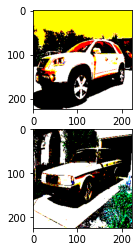

In [ ]:
gen = batch_generator(train_df, batch_size=2)
X, y = next(gen)
print(X.shape)
print(y[0].shape, y[1].shape)
print(y)

from keras.utils.np_utils import to_categorical

ll1111 = []
# label_encoder.inverse_transform(y[0][0])
for i in range(0,len(y[0])):
  y1 = int(np.argmax(y[0][i], axis=-1))
  ll1111.extend([y1])

print(len(ll1111))
print(label_encoder.inverse_transform(ll1111))

plt.figure(figsize =(10, 4))

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(len(y[0]),1) 

for i in range(0,len(y[0])):
  axarr[i].imshow(X[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2, 224, 224, 3)
(2, 196) (2, 4)
[array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
     

<Figure size 720x288 with 0 Axes>

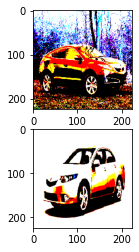

In [ ]:
gen = batch_generator(val_df, batch_size=2)
X, y = next(gen)
print(X.shape)
print(y[0].shape, y[1].shape)
print(y)

from keras.utils.np_utils import to_categorical

ll1111 = []
# label_encoder.inverse_transform(y[0][0])
for i in range(0,len(y[0])):
  y1 = int(np.argmax(y[0][i], axis=-1))
  ll1111.extend([y1])

print(len(ll1111))
print(label_encoder.inverse_transform(ll1111))

plt.figure(figsize =(10, 4))

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(len(y[0]),1) 

for i in range(0,len(y[0])):
  axarr[i].imshow(X[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2, 224, 224, 3)
(2, 196) (2, 4)
[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
     

<Figure size 720x288 with 0 Axes>

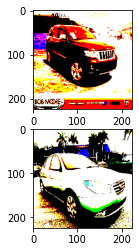

In [ ]:
gen = batch_generator(test_df, batch_size=2)
X, y = next(gen)
print(X.shape)
print(y[0].shape, y[1].shape)
print(y)

from keras.utils.np_utils import to_categorical

ll1111 = []
# label_encoder.inverse_transform(y[0][0])
for i in range(0,len(y[0])):
  y1 = int(np.argmax(y[0][i], axis=-1))
  ll1111.extend([y1])

print(len(ll1111))
print(label_encoder.inverse_transform(ll1111))

plt.figure(figsize =(10, 4))

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(len(y[0]),1) 

for i in range(0,len(y[0])):
  axarr[i].imshow(X[i])

## Build the Model

#### Load Pre-Trained Model

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.applications.efficientnet.EfficientNetB5(include_top=False, #Do not include FC layer at the end
                                       input_shape=(224, 224, 3),
                                       weights='imagenet')

115277824/115263384 [==============================] - 3s 0us/step


In [ ]:
model.summary()

Model: "efficientnetb5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0

#### Un-Freeze Few layers of Pre-trained model

In [ ]:
len(model.layers)

576

In [ ]:
# for layer in model.layers:
#     layer.trainable = True

# # # #Set pre-trained model layers to not trainable
for layer in model.layers:
    layer.trainable = True
#######Unfreezing all layers after layer#
for layer in model.layers[0:257]:
    layer.trainable = False
    # print(layer)

In [ ]:
model.summary()

Model: "efficientnetb5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0

In [ ]:
model.output

<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'top_activation')>

#### Add Final layers to the model

In [ ]:
#get Output layer of Pre-trained model
x1 = model.output

#Flatten the output to feed to Dense layer
x2 = tf.keras.layers.GlobalAveragePooling2D()(x1)

#Add one Dense layer
x3 = tf.keras.layers.Dense(2048, activation='relu')(x2)

#Batch Norm
x5 = tf.keras.layers.BatchNormalization()(x3)

#### Build layer for Classification Label output

In [ ]:
#Classification
label_output = tf.keras.layers.Dense(len(num_classes), 
                                     activation='softmax', 
                                     name='class_op')(x5)

In [ ]:
label_output

<KerasTensor: shape=(None, 196) dtype=float32 (created by layer 'class_op')>

#### Build layer for bounding box output

In [ ]:
#Regression
bbox_output = tf.keras.layers.Dense(4, 
                                    activation='sigmoid', 
                                    name='reg_op')(x5)

In [ ]:
bbox_output

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'reg_op')>

#### Finalize the model

In [ ]:
#Non Sequential model as it has two different outputs
final_model = tf.keras.models.Model(inputs=model.input, #Pre-trained model input as input layer
                                    outputs=[label_output,bbox_output]) #Output layer added

In [ ]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0]']      

#### Define function to calculate IoU

In [ ]:
def calculate_iou(y_true, y_pred):
    
    
    """
    Input:
    Keras provides the input as numpy arrays with shape (batch_size, num_columns).
    
    Arguments:
    y_true -- first box, numpy array with format [x, y, width, height, conf_score]
    y_pred -- second box, numpy array with format [x, y, width, height, conf_score]
    x any y are the coordinates of the top left corner of each box.
    
    Output: IoU of type float32. (This is a ratio. Max is 1. Min is 0.)
    
    """

    
    results = []
    
    for i in range(0,y_true.shape[0]):
    
        # set the types so we are sure what type we are using
        y_true = np.array(y_true, dtype=np.float32)
        y_pred = np.array(y_pred, dtype=np.float32)

        #print(y_true.shape)
        #print(y_pred.shape)
        # boxTrue
        x_boxTrue_tleft = y_true[i,0]  # numpy index selection
        y_boxTrue_tleft = y_true[i,1]
        boxTrue_width = y_true[i,2]
        boxTrue_height = y_true[i,3]
        area_boxTrue = (boxTrue_width * boxTrue_height)

        # boxPred
        x_boxPred_tleft = y_pred[i,0]
        y_boxPred_tleft = y_pred[i,1]
        boxPred_width = y_pred[i,2]
        boxPred_height = y_pred[i,3]
        area_boxPred = (boxPred_width * boxPred_height)

        # calculate the bottom right coordinates for boxTrue and boxPred

        # boxTrue
        x_boxTrue_br = x_boxTrue_tleft + boxTrue_width
        y_boxTrue_br = y_boxTrue_tleft + boxTrue_height # Version 2 revision

        # boxPred
        x_boxPred_br = x_boxPred_tleft + boxPred_width
        y_boxPred_br = y_boxPred_tleft + boxPred_height # Version 2 revision


        # calculate the top left and bottom right coordinates for the intersection box, boxInt

        # boxInt - top left coords
        x_boxInt_tleft = np.max([x_boxTrue_tleft,x_boxPred_tleft])
        y_boxInt_tleft = np.max([y_boxTrue_tleft,y_boxPred_tleft]) # Version 2 revision

        # boxInt - bottom right coords
        x_boxInt_br = np.min([x_boxTrue_br,x_boxPred_br])
        y_boxInt_br = np.min([y_boxTrue_br,y_boxPred_br]) 

        # Calculate the area of boxInt, i.e. the area of the intersection 
        # between boxTrue and boxPred.
        # The np.max() function forces the intersection area to 0 if the boxes don't overlap.
        
        
        # Version 2 revision
        area_of_intersection = \
        np.max([0,(x_boxInt_br - x_boxInt_tleft)]) * np.max([0,(y_boxInt_br - y_boxInt_tleft)])

        iou = area_of_intersection / ((area_boxTrue + area_boxPred) - area_of_intersection)


        # This must match the type used in py_func
        iou = np.array(iou, dtype=np.float32)
        
        # append the result to a list at the end of each loop
        results.append(iou)
    
    # return the mean IoU score for the batch
    return np.mean(results)



def IoU(y_true, y_pred):
    
    # Note: the type float32 is very important. It must be the same type as the output from
    # the python function above or you too may spend many late night hours 
    # trying to debug and almost give up.
    
    iou = tf.py_function(calculate_iou, [y_true, y_pred], tf.float32)

    return iou

In [ ]:
final_model.compile(optimizer='adam', 
                    loss={'reg_op':'mse', 'class_op':'categorical_crossentropy'},
                    # loss_weights={'reg_op':20, 'class_op':196},
                    metrics={'reg_op':[IoU], 'class_op':['accuracy']})

#### Train the model

In [ ]:
#Create train and test generator
batchsize = 64
train_generator = batch_generator(train_df, batch_size=batchsize) #batchsize can be changed
test_generator = batch_generator(val_df, batch_size=batchsize)

In [ ]:
final_model.fit(train_generator,
                epochs=5,
                steps_per_epoch= train_df.shape[0]//batchsize,validation_data=test_generator,
                validation_steps = val_df.shape[0]//batchsize)

Epoch 1/5
100/100 [==============================] - 2404s 24s/step - loss: 3.5905 - class_op_loss: 3.5152 - reg_op_loss: 0.0753 - class_op_accuracy: 0.3553 - reg_op_IoU: 0.3219 - val_loss: 3.6257 - val_class_op_loss: 3.6090 - val_reg_op_loss: 0.0168 - val_class_op_accuracy: 0.2097 - val_reg_op_IoU: 0.6293
Epoch 2/5
100/100 [==============================] - 933s 9s/step - loss: 1.3097 - class_op_loss: 1.2929 - reg_op_loss: 0.0168 - class_op_accuracy: 0.7009 - reg_op_IoU: 0.5930 - val_loss: 2.4118 - val_class_op_loss: 2.4012 - val_reg_op_loss: 0.0106 - val_class_op_accuracy: 0.4261 - val_reg_op_IoU: 0.6910
Epoch 3/5
100/100 [==============================] - 400s 4s/step - loss: 0.7066 - class_op_loss: 0.6941 - reg_op_loss: 0.0125 - class_op_accuracy: 0.8280 - reg_op_IoU: 0.6415 - val_loss: 2.2440 - val_class_op_loss: 2.2346 - val_reg_op_loss: 0.0093 - val_class_op_accuracy: 0.4958 - val_reg_op_IoU: 0.6995
Epoch 4/5
100/100 [==============================] - 202s 2s/step - loss: 0.3947

In [ ]:
optimizerVar = tf.keras.optimizers.Adam(lr=0.0001)
final_model.compile(optimizer=optimizerVar, 
                    loss={'reg_op':'mse', 'class_op':'categorical_crossentropy'},
                    metrics={'reg_op':[IoU], 'class_op':['accuracy']})

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
batchsize=16
final_model.fit(train_generator,
                epochs=10,
                initial_epoch=5,
                steps_per_epoch= train_df.shape[0]//batchsize,validation_data=test_generator,
                validation_steps = val_df.shape[0]//batchsize)

Epoch 6/10
402/402 [==============================] - 462s 1s/step - loss: 0.0553 - class_op_loss: 0.0488 - reg_op_loss: 0.0065 - class_op_accuracy: 0.9879 - reg_op_IoU: 0.7294 - val_loss: 1.3160 - val_class_op_loss: 1.3100 - val_reg_op_loss: 0.0060 - val_class_op_accuracy: 0.7112 - val_reg_op_IoU: 0.7405
Epoch 7/10
402/402 [==============================] - 429s 1s/step - loss: 0.0155 - class_op_loss: 0.0109 - reg_op_loss: 0.0046 - class_op_accuracy: 0.9982 - reg_op_IoU: 0.7613 - val_loss: 1.2227 - val_class_op_loss: 1.2174 - val_reg_op_loss: 0.0054 - val_class_op_accuracy: 0.7210 - val_reg_op_IoU: 0.7527
Epoch 8/10
402/402 [==============================] - 427s 1s/step - loss: 0.0164 - class_op_loss: 0.0128 - reg_op_loss: 0.0036 - class_op_accuracy: 0.9977 - reg_op_IoU: 0.7820 - val_loss: 1.2291 - val_class_op_loss: 1.2243 - val_reg_op_loss: 0.0048 - val_class_op_accuracy: 0.7285 - val_reg_op_IoU: 0.7648
Epoch 9/10
402/402 [==============================] - 417s 1s/step - loss: 0.00

In [ ]:
final_model.save('/content/drive/MyDrive/MachineLearning/CapstoneProject/savedModels/Cars_196_dataset_localization.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


#### Model Prediction

In [ ]:
def predict_and_draw(image_num, df):

    #Load image
    img = tf.keras.preprocessing.image.load_img(df.loc[image_num, 'File'])
    w, h = img.size

    #Prepare input for model
    #1. Resize image
    img_resized = img.resize((img_size, img_size))
    #2. Conver to array and make it a batch of 1
    input_array = tf.keras.preprocessing.image.img_to_array(img_resized)
    input_array = np.expand_dims(input_array, axis=0)

    #3. Normalize image data
    input_array = tf.keras.applications.resnet50.preprocess_input(input_array)

    #Prediction
    pred = final_model.predict(input_array)
    #Get classification and regression predictions
    label_pred, bbox_pred = pred[0][0], pred[1][0]
    #Get Label with highest probability
    pred_class = label_class_dict[np.argmax(label_pred)]

    #Read actual label and bounding box
    act_class = df.loc[image_num, 'Class']
    xmin, ymin, xmax, ymax = df.loc[image_num, ['xmin', 'ymin', 'xmax', 'ymax']]

    print('Real Label :', act_class, '\nPredicted Label: ', pred_class)
    
    #Draw bounding boxes - Actual (Red) and Predicted(Green)
    img = cv2.imread(df.loc[image_num, 'File'])
    
    #Draw actual bounding box - Red
    img = cv2.rectangle(img, (xmin, ymin), 
                        (xmax, ymax), (0,0,255), 3)
    
    #Draw predicted bounding box -  Green
    img = cv2.rectangle(img, (int(bbox_pred[0]*w), int(bbox_pred[1]*h)), 
                        (int((bbox_pred[0]+bbox_pred[2])*w), int((bbox_pred[1]+bbox_pred[3])*h)), (0,255,0), 3
                        )

    #Display the picture
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

Real Label : 155 
Predicted Label:  Land Rover LR2 SUV 2012


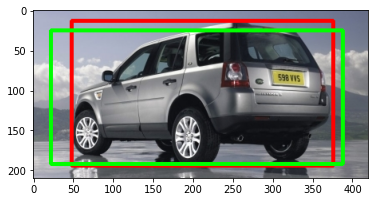

In [ ]:
#Predict on Test Dataset
image_num = np.random.randint(0, test_df.shape[0])
predict_and_draw(image_num, test_df)